<a href="https://colab.research.google.com/github/lili-hdz/inteligencia_artificial/blob/main/Multicapa%20/%20Prediccion_combustible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio: Predicción de la eficiencia del combustible
Practica de redes neuronales / MULTICAPA

---
Liliana Patricia Hernandez Cruz

Mostraremos un ejemplo sencillo de un problema de predicción para el consumo de gasolina de vehiculos, utilizando los mádulos de tensorflow, numpy y pandas y para el conjunto de datos del Auto MPG utilizamos el módulo ucimlrepo.

La base de datos Auto MPG, es un conjunto de datos clásico utilizado en problemas de regresión, que contiene información sobre la eficiencia de combustible (millas por galón, o MPG) de diferentes automóviles fabricados en los años 70 y principios de los 80.

Más información del conjunto de datos se puede consultar en https://archive.ics.uci.edu/dataset/9/auto+mpg

Para trabajar con el conjunto de datos hacemos lo siguiente, de acuerdo a su documentación

In [1]:
pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets


In [ ]:
X.head() #Muestra el conjunto "X" y las primeras 5 filas de la BD


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [ ]:
y.head() #Muestra el conjunto "y" y las primeras 5 filas de la BD


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Preprocesamiento de datos.

In [ ]:
X.info()
#Como detalla la informacion de nuestra BD podemos ver cuantas variables nulas hay en "X" y "Y"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [ ]:
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [ ]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()

#Importamos pandas y con (.dropna()) eliminamos los valores nulos.

In [ ]:
df.info()
#Describe cuantas variables nulas tiene nuestro conjunto


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [ ]:
X = df.drop('mpg', axis=1)
y = df['mpg']

#Definimos los conjuntos


Dividimos los conjuntos

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)
#Separamos nuestros datos de prueba y entrenamiento
#Como prueba tendremos el 20%


In [ ]:
print(X_train.shape)
print(X_test.shape)
#Muestra las filas y columnas totales de nuestro conjunto de prueba y entrenamiento.

(313, 7)
(79, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Escalar nuestros datos con el (.fit) y el (.transform), para que la media sea 0 y la desviación estándar de 1.


#Red Neuronal

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
#Tenemos 4 capas, de las cuales 3 están ocultas y la capa de salida tiene solo una neurona

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
#Utilizamos el optimizador adam para acelerar y minimizar errores en el modelo


Compilar el modelo

In [ ]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)
#Compilamos nuestro modelo con el optimizador Adam y la función de pérdida error cuadrático medio  (mean_squared_error) .

Entrenamos el modelo

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=1,
    validation_data=(X_test, y_test)
)
#Entrenamos nuestro modelo con el (.fit) y con 100 épocas

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.0757 - root_mean_squared_error: 3.0001 - val_loss: 11.6933 - val_root_mean_squared_error: 3.4195
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5277 - root_mean_squared_error: 2.7258 - val_loss: 9.8224 - val_root_mean_squared_error: 3.1341
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2403 - root_mean_squared_error: 2.6647 - val_loss: 9.9137 - val_root_mean_squared_error: 3.1486
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2799 - root_mean_squared_error: 2.6908 - val_loss: 10.7638 - val_root_mean_squared_error: 3.2808
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6964 - root_mean_squared_error: 2.5783 - val_loss: 10.1773 - val_root_mean_squared_error: 3.1902
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0874 - root_mean_squared_error: 2.8342 - val_loss: 9.5897 - val_root_mean_squared_error: 3.0967
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s

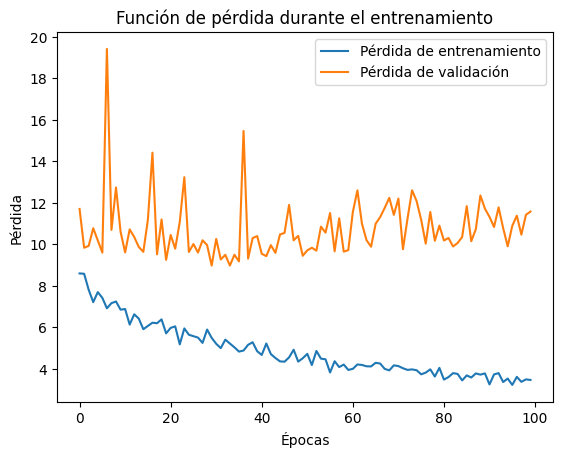

In [ ]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

#La función de pérdida siempre debe tender a cero


Evaluación

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.0978 - root_mean_squared_error: 3.1263
Test Mean Absolute Error: 3.40


In [ ]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())

#Hace predicciones y las compara con los valores reales.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
     Actual  Predicted
82     23.0  23.097418
167    29.0  27.846693
356    32.4  33.134441
120    19.0  21.108337
385    38.0  36.846024


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

#r2_score mide qué tan bien las predicciones se ajustan a los valores reales

R²: 0.8331526313715619
MSE: 11.566239217203236
